In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('spam.csv',encoding='latin1')
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


# Data Cleaning


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# drop last 3 columns  as most of values are null
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
# renaming col
df.rename(columns={'v1':"Target",'v2':"Text"},inplace =True)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [7]:
df['Target']=encoder.fit_transform(df['Target'])
df.head()
# 0-ham 1- spam

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# missing values checking
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [9]:
# check for duplicate values
df.duplicated().sum()

403

In [10]:
df= df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)


# EDA

In [13]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

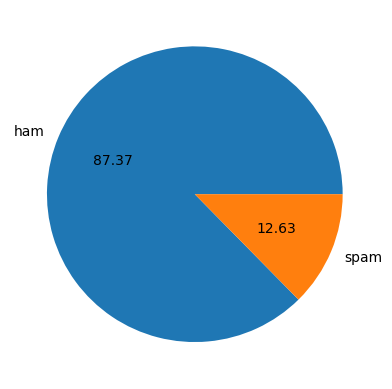

In [14]:
## dataset is imbalanced
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show

In [15]:
df['num_characters']=df['Text'].apply(len)

In [16]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
df.isnull().sum()

Target            0
Text              0
num_characters    0
dtype: int64

In [18]:
df['Text'] = df['Text'].astype(str)  # Ensure all are strings

In [19]:
import nltk
print(nltk.data.path)

['C:\\Users\\ASUS/nltk_data', 'c:\\Users\\ASUS\\anaconda3\\nltk_data', 'c:\\Users\\ASUS\\anaconda3\\share\\nltk_data', 'c:\\Users\\ASUS\\anaconda3\\lib\\nltk_data', 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [20]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
df['num_tokens'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
df.head()

,Target,Text,num_characters,num_tokens
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
df[['num_characters','num_tokens','num_sentences']].describe()

,num_characters,num_tokens,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
##  0-ham description
df[df['Target']==0][['num_characters','num_tokens','num_sentences']].describe()

,num_characters,num_tokens,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
##  1-spam description
df[df['Target']==1][['num_characters','num_tokens','num_sentences']].describe()

,num_characters,num_tokens,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
## clearly we can see length of spam is more than ham
## visualizing through histogram
!pip install seaborn
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

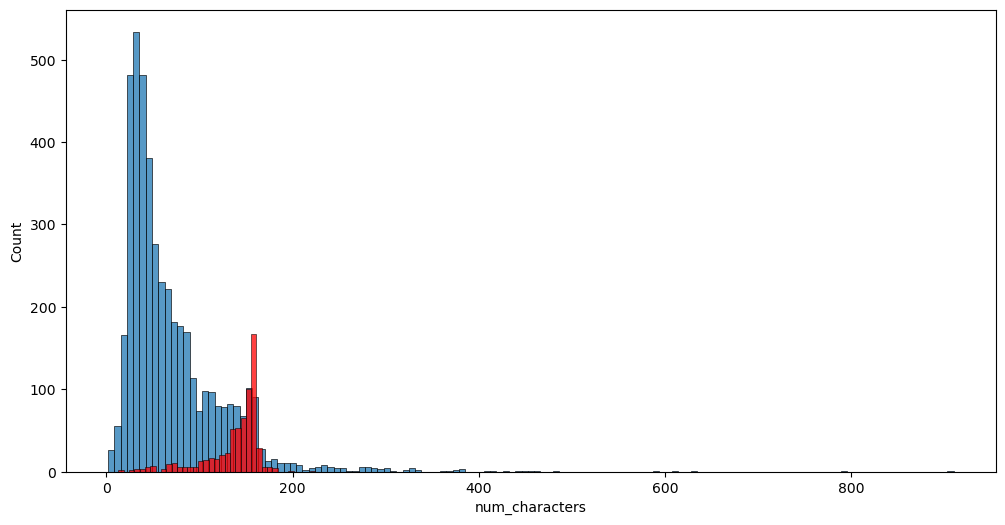

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_tokens', ylabel='Count'>

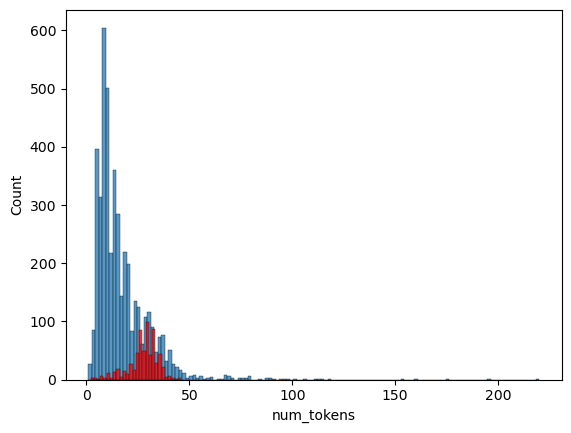

In [29]:
sns.histplot(df[df['Target']==0]['num_tokens'])
sns.histplot(df[df['Target']==1]['num_tokens'],color='red')

In [30]:
## after this graph we can see that there are some messages which are having more than
## 200 tokens from ham and spam 
## we hace to remove this outliers from our dataset


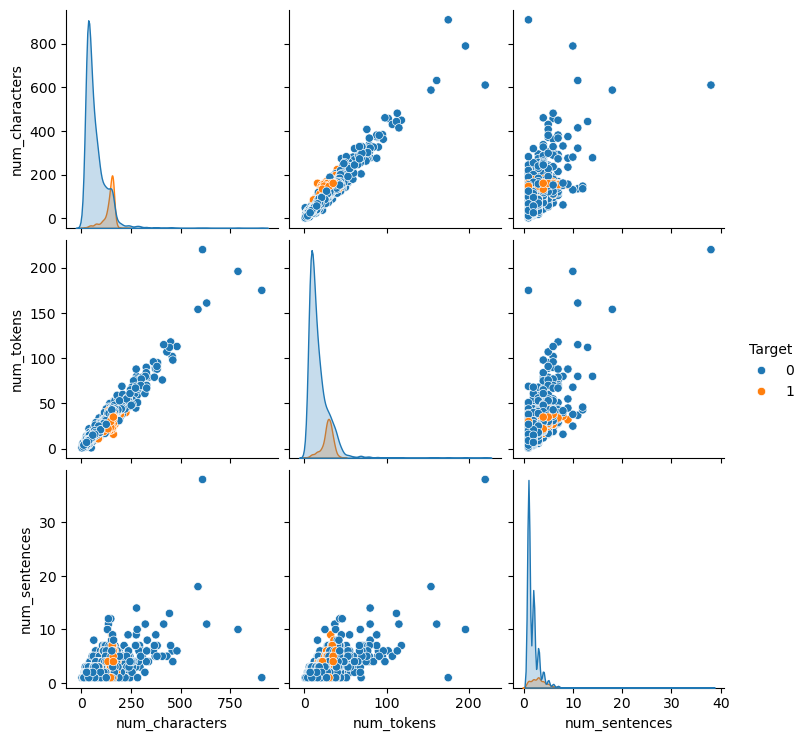

In [31]:
sns.pairplot(df,hue='Target')

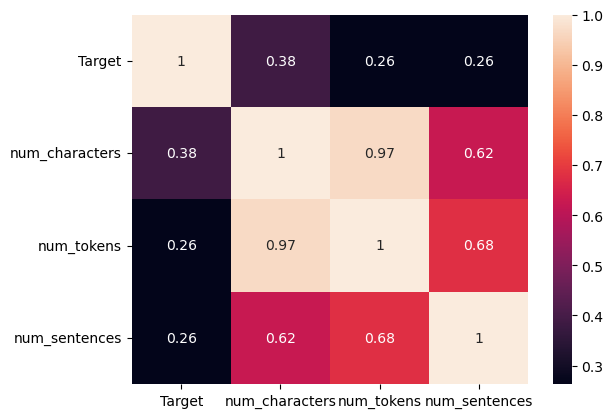

In [32]:
## correlation bt col
## corr works only with numerical columns
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True)
plt.show()

In [33]:
## we will keep num_characters col as it is having high corelation with target

# DATA PREPROCESSING
lowercase  
tokenization  
Removing special characters   
removing stop words and punctuation  
stemming

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [38]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text) ## tokenize and gives list of words
    y=[]
    for i in text:
        if i.isalnum(): ## using alnum to remove special characters
            y.append(i)

    text=y[:] ## list cannot be copied you have to clone it, done by [:] using this.
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y) ## returning as string 

In [39]:
df.head()

,Target,Text,num_characters,num_tokens,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
df['transformed_text']=df['Text'].apply(transform_text)

In [41]:
df.head()

,Target,Text,num_characters,num_tokens,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
## wordcloud generates size of words shows it's frequency or its importance
!pip install WordCloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

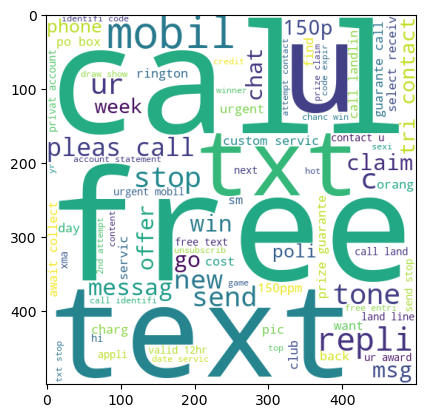

In [44]:
plt.imshow(spam_wc)

In [45]:
ham_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

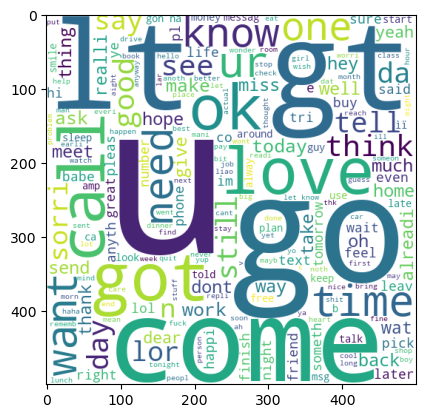

In [46]:
plt.imshow(ham_wc)

In [47]:
spam_corpus=[]
for msg in df[df["Target"]==1]['transformed_text'].tolist(): ## combined all rows and converted into list
    for word in msg.split():## breaking string into a list of sub string
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

9939

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25520\2700633941.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_spam_words,palette='rainbow')


<Axes: xlabel='count', ylabel='word'>

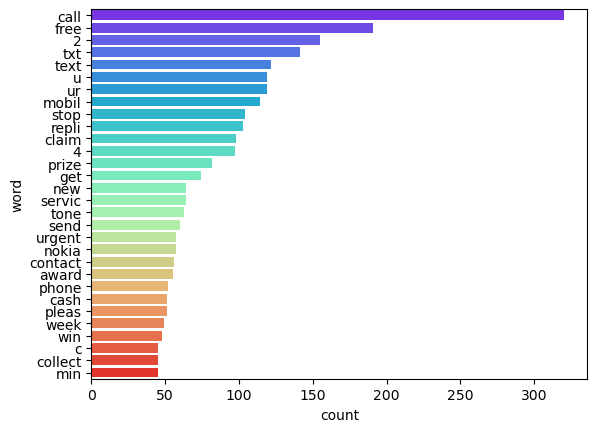

In [49]:
from collections import Counter
# Prepare the data for plotting
top_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='count', y='word', data=top_spam_words,palette='rainbow')

In [50]:
ham_corpus=[]
for msg in df[df["Target"]==0]['transformed_text'].tolist(): ## combined all rows and converted into list
    for word in msg.split():## breaking string into a list of sub string
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

35404

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25520\2842590403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_ham_words,palette='rainbow')


<Axes: xlabel='count', ylabel='word'>

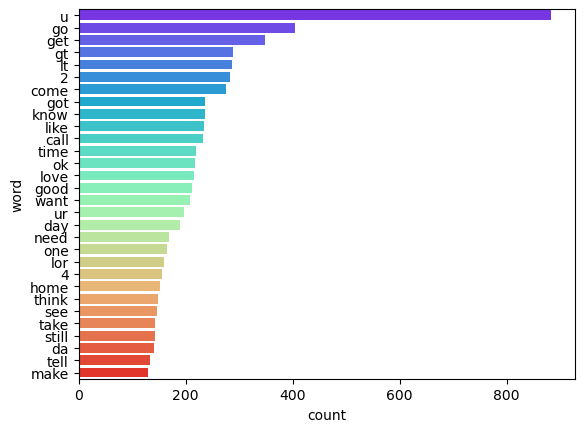

In [52]:
top_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='count', y='word', data=top_ham_words,palette='rainbow')

## MACHINE LEARNING MODEL APPLYING

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv=CountVectorizer()
tfidf=TfidfTransformer()

In [54]:
# Limit features in CountVectorizer, not TfidfTransformer
cv = CountVectorizer(max_features=3000)
X_counts = cv.fit_transform(df["transformed_text"])
X = tfidf.fit_transform(X_counts).toarray()

In [55]:
X.shape

(5169, 3000)

In [56]:
y=df['Target'].values

In [57]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [61]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [62]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [63]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [64]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [65]:
## since precsion is more valuable we will keep mnb tfidf
## we used max_features in cv for model improvement


In [66]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model_used.pkl','wb'))

In [67]:
import pickle
tfidf=pickle.load(open('vectorizer.pkl','rb'))

In [68]:
model=pickle.load(open('model_used.pkl','rb'))
